### Packages Required   

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Input,LSTM,Dropout,Flatten
from keras.optimizers import Adam,RMSprop


### Datasets

In [1]:
path = 'C:/Users/Nithin/Downloads/Airlines Passengers Forecasting/'

In [3]:
df = pd.read_csv(path + 'Datasets/International Airline Passengers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   No_passengers_thousands  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.isna().sum()

Month                      0
No_passengers_thousands    0
dtype: int64

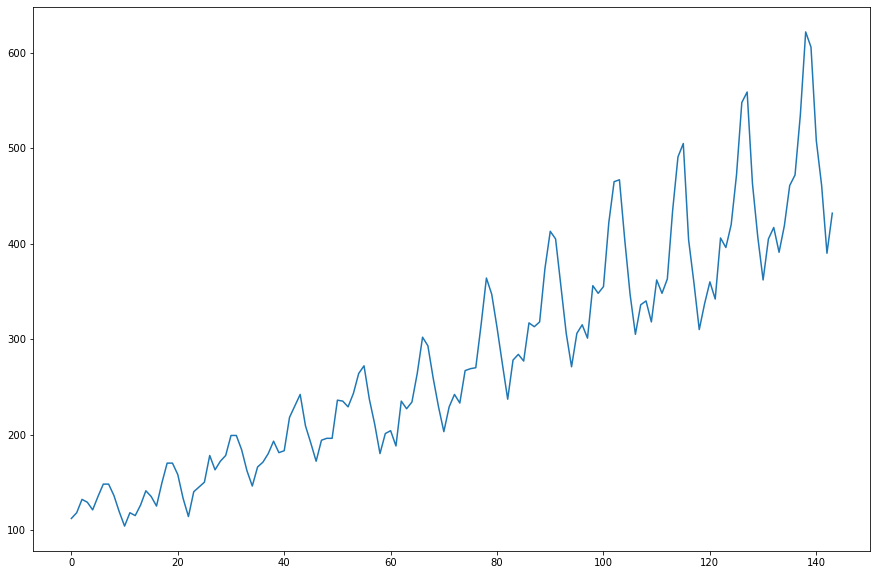

In [9]:
plt.figure(figsize=(15,10))
plt.plot(df.No_passengers_thousands)

### Data Preprocessing

In [15]:
data = df.iloc[:,1:]

In [16]:
sc = MinMaxScaler(feature_range=(0,1))
data_std = sc.fit_transform(data)

In [18]:
data_std.shape

(144, 1)

In [22]:
train_size = int(len(data_std) * 0.7)

In [23]:
test_size = int(len(data_std) - int(len(data_std) * 0.7))

In [25]:
train_df = data_std[0:train_size,:]

In [27]:
test_df = data_std[train_size:len(data_std),:]

In [30]:
def create_dataset(dataset, time_step=1):
	data_x, data_y = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		data_x.append(a)
		data_y.append(dataset[i + time_step, 0])
	return np.array(data_x), np.array(data_y)

In [31]:
train_x, train_y = create_dataset(train_df, 4)
test_x, test_y = create_dataset(test_df, 4)

In [33]:
train_x.shape, train_y.shape

((95, 4), (95,))

In [34]:
train_x =train_x.reshape(train_x.shape[0], 4, 1)
test_x = test_x.reshape(test_x.shape[0], 4, 1)

In [36]:
train_x.shape

(95, 4, 1)

### Model Building

In [40]:
M0 = Sequential()
M0.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
M0.add(LSTM(50))
M0.add(Dense(1))

In [41]:
M0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4, 50)             10400     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [42]:
M0.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
M0.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
95/95 [==============================] - 3s 10ms/step - loss: 0.0181 - val_loss: 0.0366
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0314
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.0283
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0304
Epoch 5/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0260
Epoch 6/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0250
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0249
Epoch 8/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0226
Epoch 9/100
95/95 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0226
Epoch 10/100
95/95 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0360
Epoch 11

In [44]:
train_pred = M0.predict(train_x)
test_pred = M0.predict(test_x)

2/2 [==============================] - 0s 0s/step


In [46]:
train_pred = sc.inverse_transform(train_pred)
test_pred = sc.inverse_transform(test_pred)

In [66]:
train_pred_df = pd.DataFrame(train_pred)
test_pred_df = pd.DataFrame(test_pred)

In [68]:
predicted = pd.concat((train_pred_df,test_pred_df),axis=0)

In [ ]:
plt.plot(test_pred,color = 'red', label = 'Real Price')
plt.plot(train_pred, color = 'blue', label = 'Predicted Price')
plt.title('Airline Passenger Forecasting')
plt.xlabel('Time')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()